In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR


# Set visualization style
sns.set(style="whitegrid")

In [3]:
# List files in the directory to find the correct CSV file name
# directory_path = '/kaggle/input/nigeria-agri-econ-indicators-1950-2023' # This path is for Kaggle environments
# print(os.listdir(directory_path))

# Assuming the data is in the current working directory or a known path accessible in this environment.
# If the data is in a specific directory, replace '.' with the correct path.
directory_path = '.' # Replace '.' with the actual path to your data directory
print(os.listdir(directory_path))

# Load the dataset with the correct file name
csv_file = 'nigeria_agricultural_economic_indicators_1950_2023.csv'  # Replace with the actual file name
df = pd.read_csv(os.path.join(directory_path, csv_file))

# Display the first few rows of the dataset
print(df.head())

['.config', 'nigeria_agricultural_economic_indicators_1950_2023.csv', 'sample_data']
   year  avg_temp_c  precipitation_mm  rel_humidity  crop_prod_index  \
0  1950       25.82           1060.28         57.75              NaN   
1  1951       25.86           1220.57         60.56              NaN   
2  1952       25.91           1140.11         58.29              NaN   
3  1953       25.94           1090.55         58.27              NaN   
4  1954       25.98           1031.32         59.03              NaN   

   livestock_prod_index  fish_prod_tons  gdp_lcu  agri_value_added_lcu  \
0                   NaN             NaN      NaN                   NaN   
1                   NaN             NaN      NaN                   NaN   
2                   NaN             NaN      NaN                   NaN   
3                   NaN             NaN      NaN                   NaN   
4                   NaN             NaN      NaN                   NaN   

   agri_land_sqkm  
0             NaN

In [4]:
# Interpolate missing values using linear interpolation
df_interpolated = df.interpolate(method='linear', axis=0, limit_direction='both')

# Check for any remaining missing values
print(df_interpolated.isnull().sum())

year                    0
avg_temp_c              0
precipitation_mm        0
rel_humidity            0
crop_prod_index         0
livestock_prod_index    0
fish_prod_tons          0
gdp_lcu                 0
agri_value_added_lcu    0
agri_land_sqkm          0
dtype: int64


In [5]:
# Summary statistics
print(df_interpolated.describe())

              year  avg_temp_c  precipitation_mm  rel_humidity  \
count    74.000000   74.000000         74.000000     74.000000   
mean   1986.500000   26.702027       1084.586622     57.966351   
std      21.505813    0.493991        110.545451      1.829635   
min    1950.000000   25.490000        770.750000     52.850000   
25%    1968.250000   26.370000       1007.867500     57.015000   
50%    1986.500000   26.720000       1081.345000     57.990000   
75%    2004.750000   27.057500       1170.790000     58.930000   
max    2023.000000   27.730000       1319.710000     63.090000   

       crop_prod_index  livestock_prod_index  fish_prod_tons       gdp_lcu  \
count        74.000000             74.000000    7.400000e+01  7.400000e+01   
mean         48.856757             54.847838    4.109714e+05  2.668971e+13   
std          32.993684             33.170700    3.471291e+05  5.267503e+13   
min          19.310000             15.710000    5.501000e+04  2.997269e+09   
25%          21

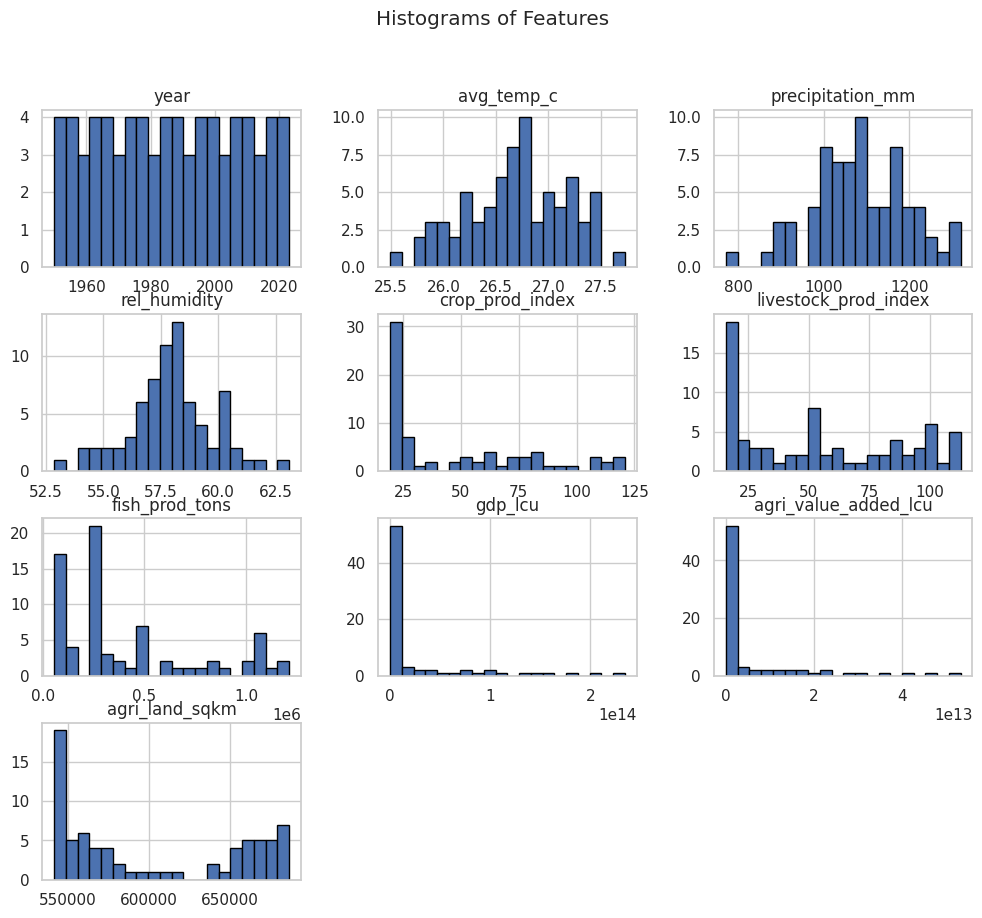

In [6]:
# Plot histograms for all numerical features
df_interpolated.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

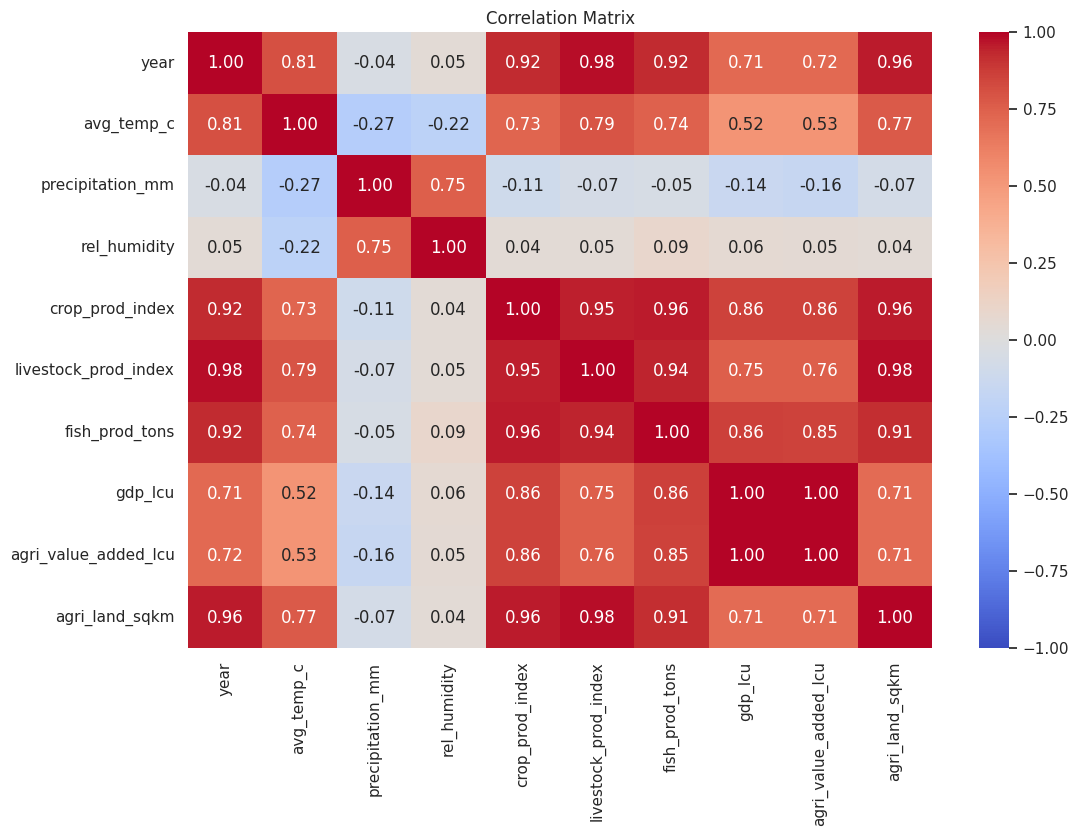

In [7]:
# Compute the correlation matrix
correlation_matrix = df_interpolated.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

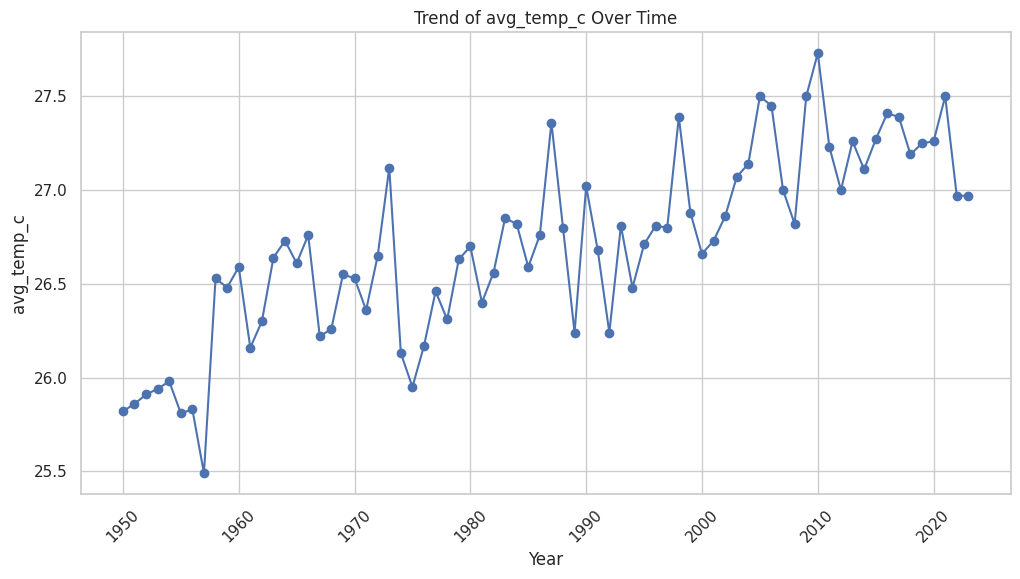

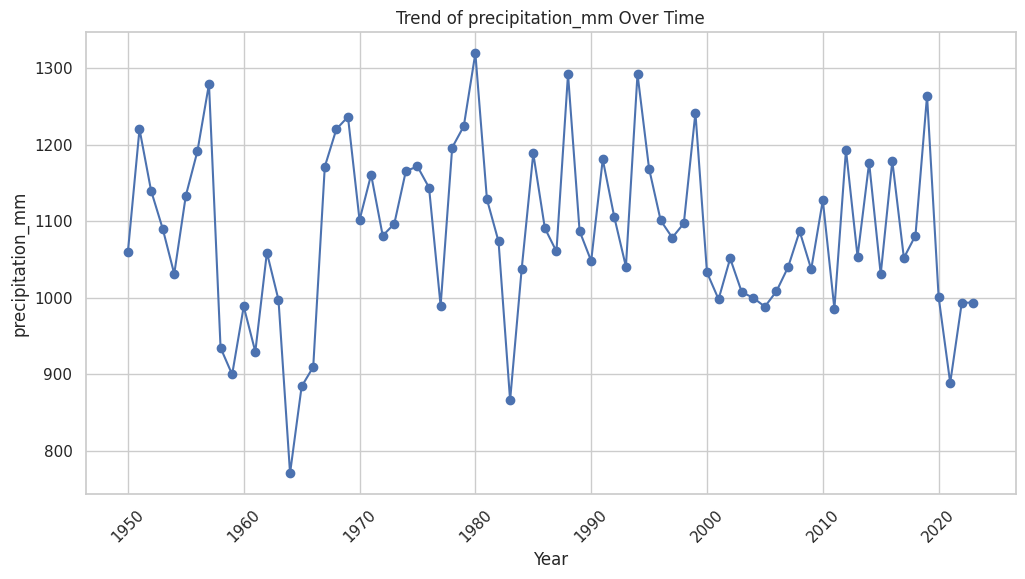

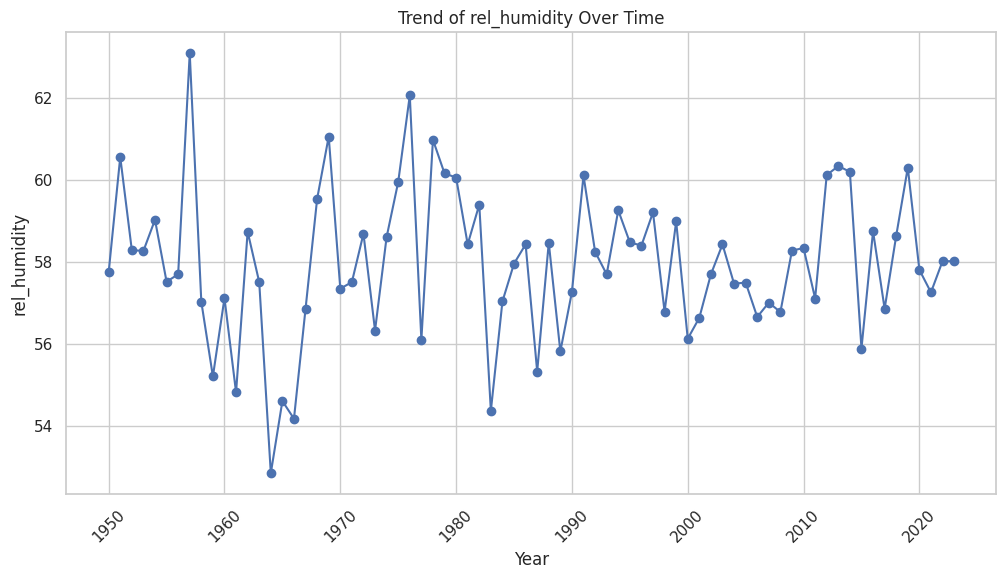

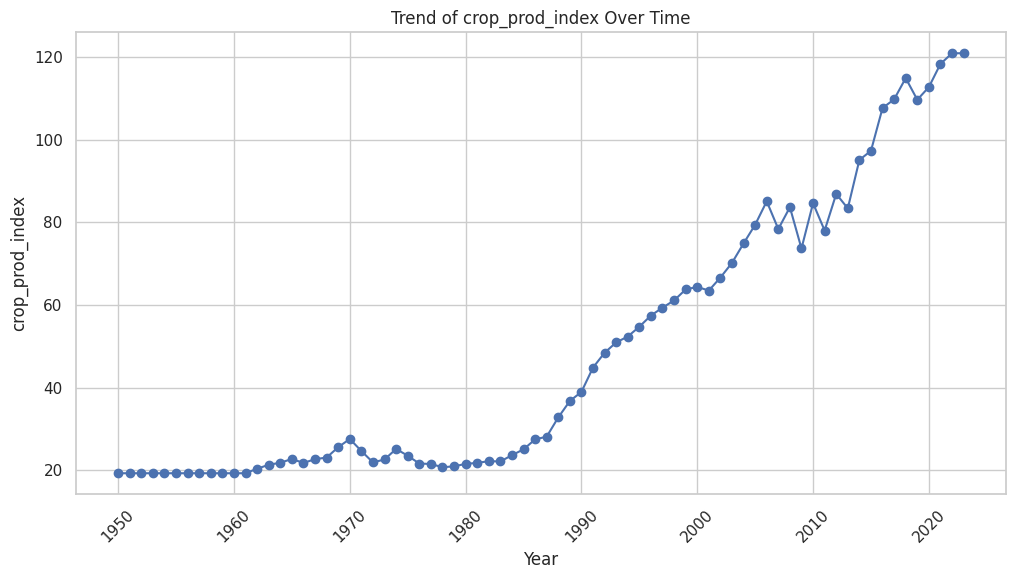

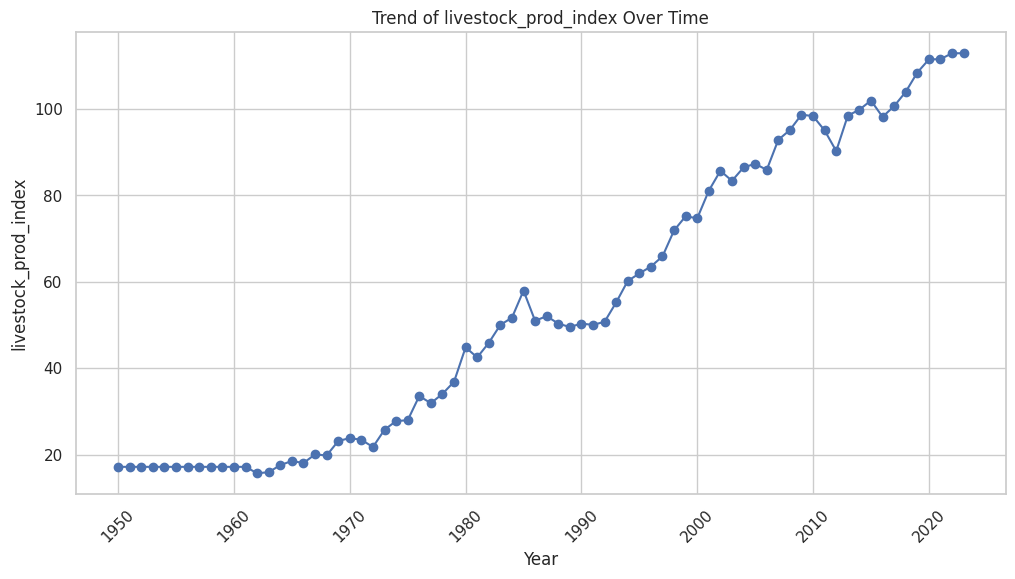

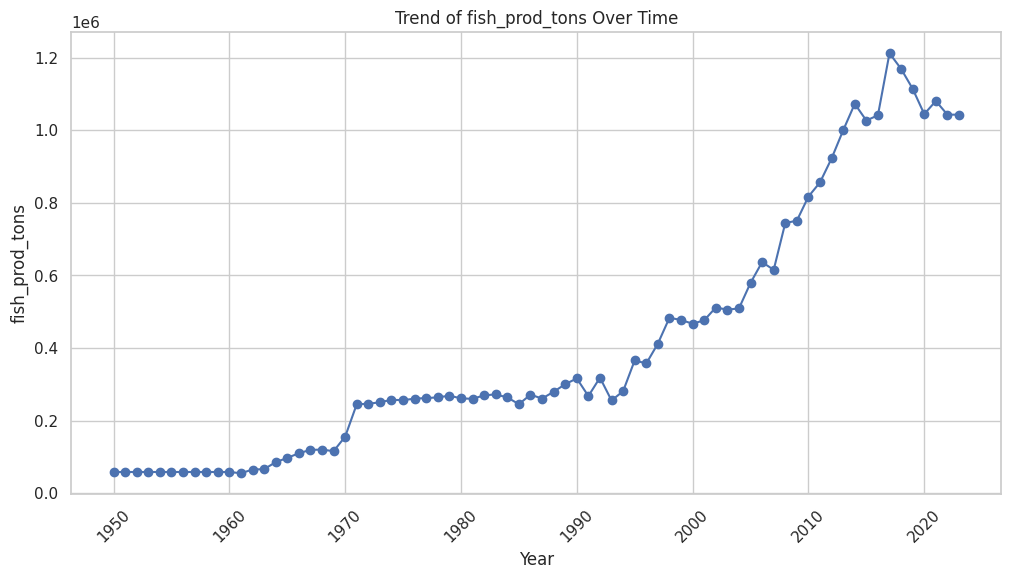

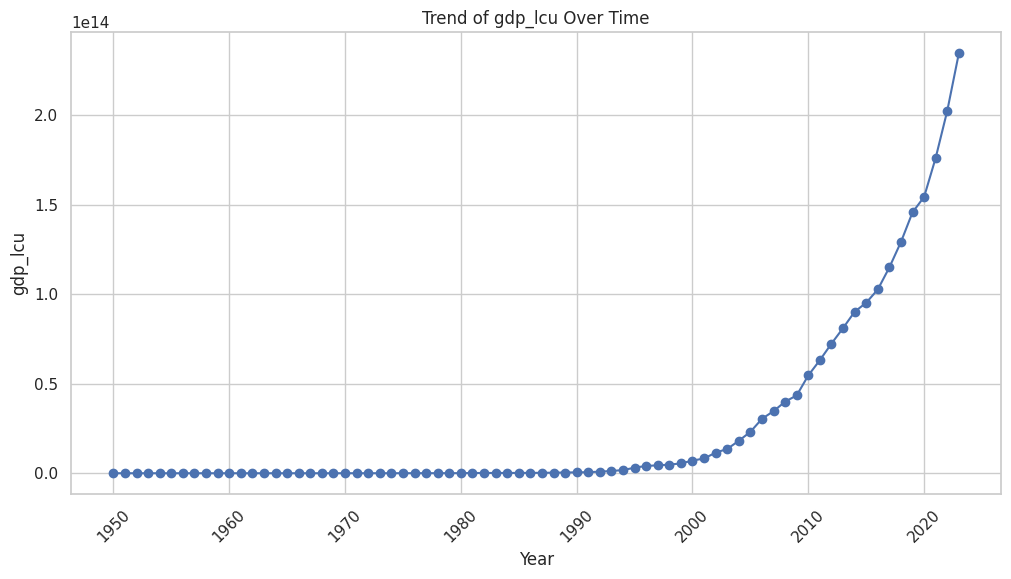

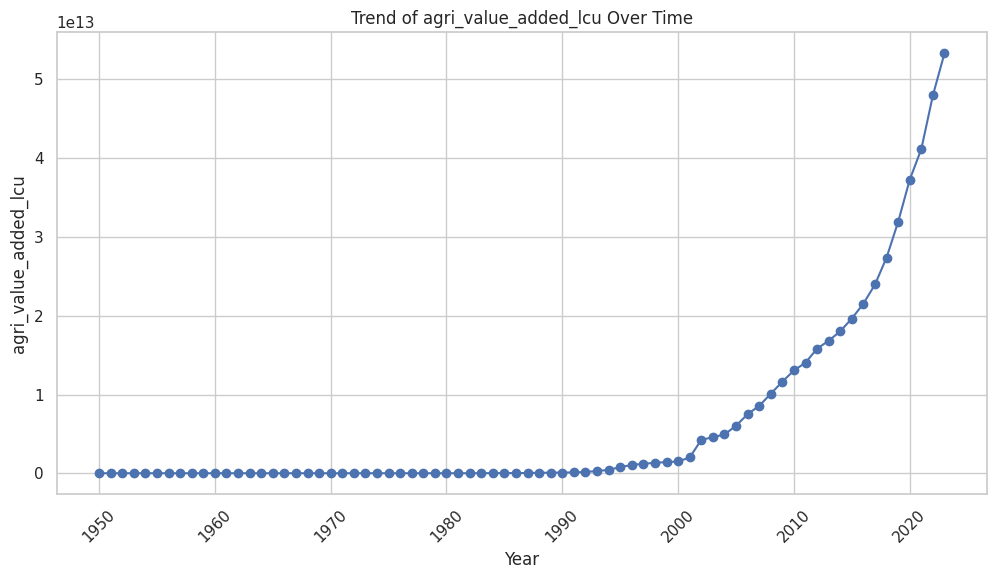

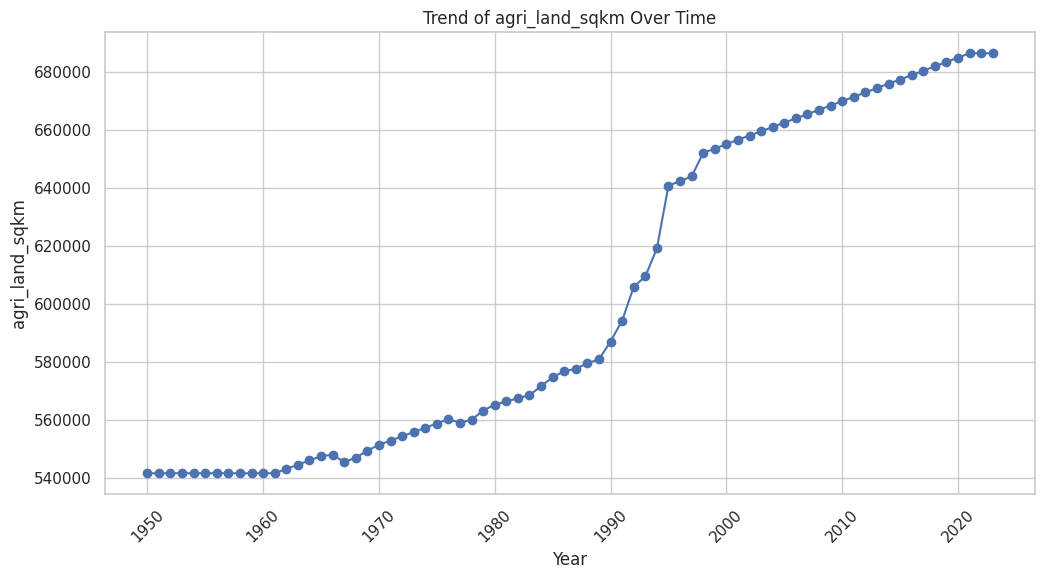

In [8]:
def plot_trend(df_interpolated, column, date_column='year'):
    plt.figure(figsize=(12, 6))
    plt.plot(df_interpolated[date_column], df_interpolated[column], marker='o')
    plt.title(f'Trend of {column} Over Time')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# List of columns to plot
columns_to_plot = [
    'avg_temp_c',
    'precipitation_mm',
    'rel_humidity',
    'crop_prod_index',
    'livestock_prod_index',
    'fish_prod_tons',
    'gdp_lcu',
    'agri_value_added_lcu',
    'agri_land_sqkm'
]

# Generate plots for each column
for column in columns_to_plot:
    plot_trend(df_interpolated, column)


In [9]:
#Multiple Linear Regression
# Independent variables (avg_temp_c, precipitation_mm, rel_humidity)
X = df_interpolated[['avg_temp_c', 'precipitation_mm', 'rel_humidity']]

# Dependent variable (crop production index)
y = df_interpolated['crop_prod_index']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 504.65934737319833
R^2 Score: 0.5418302618802757


                               SARIMAX Results                                
Dep. Variable:        crop_prod_index   No. Observations:                   74
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -176.937
Date:                Tue, 01 Jul 2025   AIC                            365.874
Time:                        09:22:09   BIC                            379.617
Sample:                             0   HQIC                           371.351
                                 - 74                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0450      0.114      0.395      0.693      -0.178       0.268
ar.L2          0.5347      0.082      6.535      0.000       0.374       0.695
ar.L3         -0.2636      0.153     -1.726      0.0

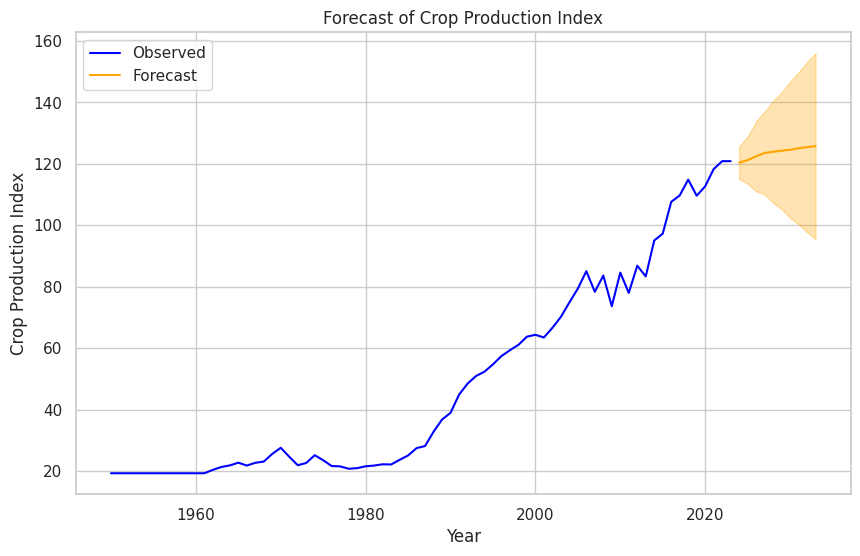

In [11]:
# Define the time series
series = df_interpolated['crop_prod_index']

# Fit ARIMA model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Generate forecast
forecast = model_fit.get_forecast(steps=10)  # Change steps as needed
# Adjust index for forecasting years
forecast_index = range(series.index[-1] + df_interpolated['year'].iloc[0] + 1, series.index[-1] + df_interpolated['year'].iloc[0] + 1 + 10)


# Confidence intervals
conf_int = forecast.conf_int()

# Plot the original series
plt.figure(figsize=(10, 6))
plt.plot(df_interpolated['year'], series, label='Observed', color='blue') # Use original year column for plotting

# Plot forecast
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)

plt.title('Forecast of Crop Production Index')
plt.xlabel('Year')
plt.ylabel('Crop Production Index')
plt.legend()
plt.show()

In [12]:
# Select the variables
df_var = df_interpolated[['avg_temp_c', 'precipitation_mm', 'crop_prod_index', 'gdp_lcu']]

# Fit the VAR model with a reduced number of lags
model = VAR(df_var)
model_fitted = model.fit(maxlags=5, ic='aic')  # Reduced maxlags to 5

# Summary of the model
print(model_fitted.summary())

# Forecast
forecast_input = df_var.values[-model_fitted.k_ar:]
forecast = model_fitted.forecast(y=forecast_input, steps=5)

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=['Forecasted_Year_1', 'Forecasted_Year_2', 'Forecasted_Year_3', 'Forecasted_Year_4', 'Forecasted_Year_5'], columns=df_var.columns)
print(forecast_df)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 01, Jul, 2025
Time:                     09:22:38
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    68.2856
Nobs:                     70.0000    HQIC:                   66.9690
Log likelihood:          -2642.85    FPE:                5.30472e+28
AIC:                      66.1014    Det(Omega_mle):     2.22319e+28
--------------------------------------------------------------------
Results for equation avg_temp_c
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.009401         5.330425            0.002           0.999
L1.avg_temp_c               0.503263         0.156504            3.216           0.001
L1.precipitation_mm        -0.0